In [3]:
import numpy as np

# Create functions

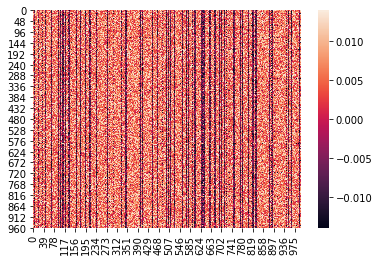

In [308]:
N_NEURONS = 1000
W = np.random.rand(N_NEURONS, N_NEURONS)

random_inhib = (np.random.rand(1000) <.2)
W[:, random_inhib] = -1* W[:, random_inhib]

ratio = 1 / N_NEURONS / W.mean()
# Tirar conexao com si mesmo
W = ratio * W * 4

sns.heatmap(W)

In [ ]:
# TODO Plasticidade
# TODO Leak
# TODO disparo probabilistico

In [301]:
v = np.zeros((N_NEURONS, 1))
dt = 1  # 1 millissecond

def spike(v, threshold=1):
    s = v >= threshold
    v[s] = 0
    return s, v

def propagate_spike(s, W):
    nt = W @ s
    return nt

def synapse(nt):
    delta_voltage = .3*nt
    return delta_voltage

def external_input(v, t, I=.01, tmax=200):
    if t < tmax:
        return np.random.normal(I, I/5, v.shape)
    else:
        return np.zeros_like(v)
    
def run_simulation(v, W, dt, tmax):
    spike_history = []
    voltage_history = []
    external_input_history = []
    delta_history = []
    nt_history = []
    for t_i in range(int(tmax/dt)):
        s, v = spike(v)
        nt = propagate_spike(s, W)
        ei = external_input(v, t_i)
        delta_voltage = synapse(nt) + ei
        v = v + delta_voltage
        
        # Save for later
        spike_history.append(s)
        voltage_history.append(delta_voltage)
        nt_history.append(nt)
        delta_history.append(delta_voltage)
        external_input_history.append(ei)
    return  (
        np.hstack(spike_history),
        np.hstack(voltage_history),
        np.hstack(nt_history),
        np.hstack(delta_history),
        np.hstack(external_input_history),
    )

# Test functions

In [178]:
print(spike(v = np.array([0, .5, .9])))
print(spike(v = np.array([0, 1., .9])))
print(spike(v = np.array([0, -1., .9])))

(array([False, False, False]), array([0. , 0.5, 0.9]))
(array([False,  True, False]), array([0. , 0. , 0.9]))
(array([False, False, False]), array([ 0. , -1. ,  0.9]))


In [57]:
s = np.array([True, False, False]).reshape(3, 1)
print(propagate_spike(s, W))

s = np.array([True, False, True]).reshape(3, 1)
print(propagate_spike(s, W))

[[0]
 [0]
 [1]]
[[2]
 [1]
 [1]]


In [58]:
W@ s

array([[2],
       [1],
       [1]])

In [302]:
%%time
(spike_history,
voltage_history,
nt_history,
delta_history,
external_input_history) = run_simulation(v, W, dt, tmax=10000)

CPU times: user 4.38 s, sys: 529 ms, total: 4.91 s
Wall time: 1.07 s


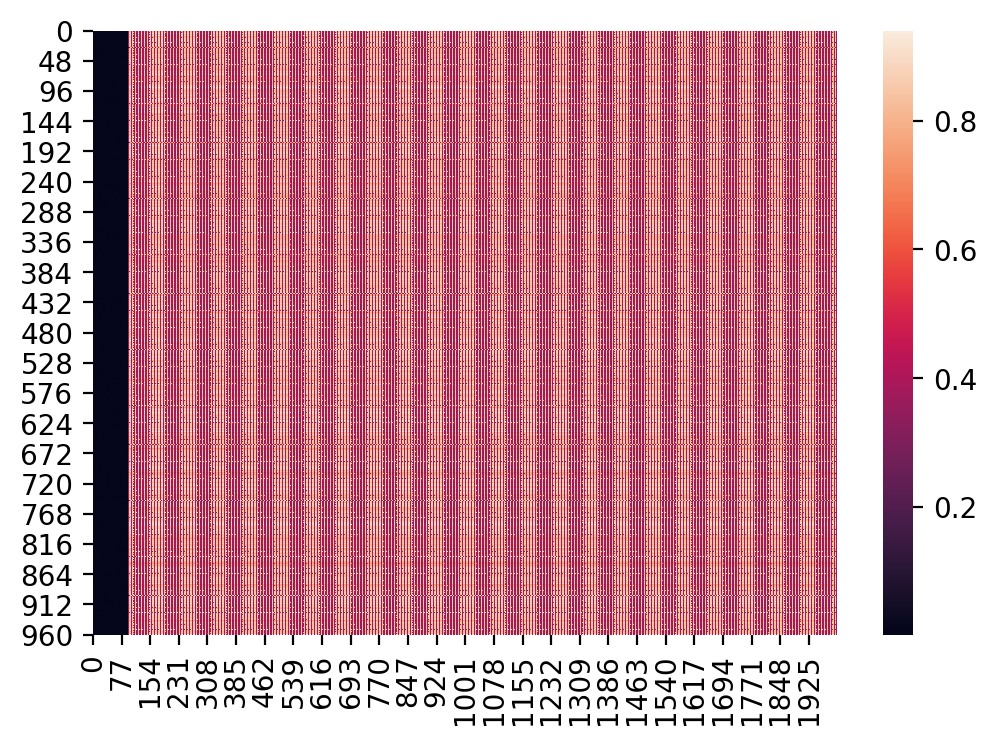

In [303]:
plt.figure(dpi=200)
sns.heatmap(voltage_history[:,0:2000])

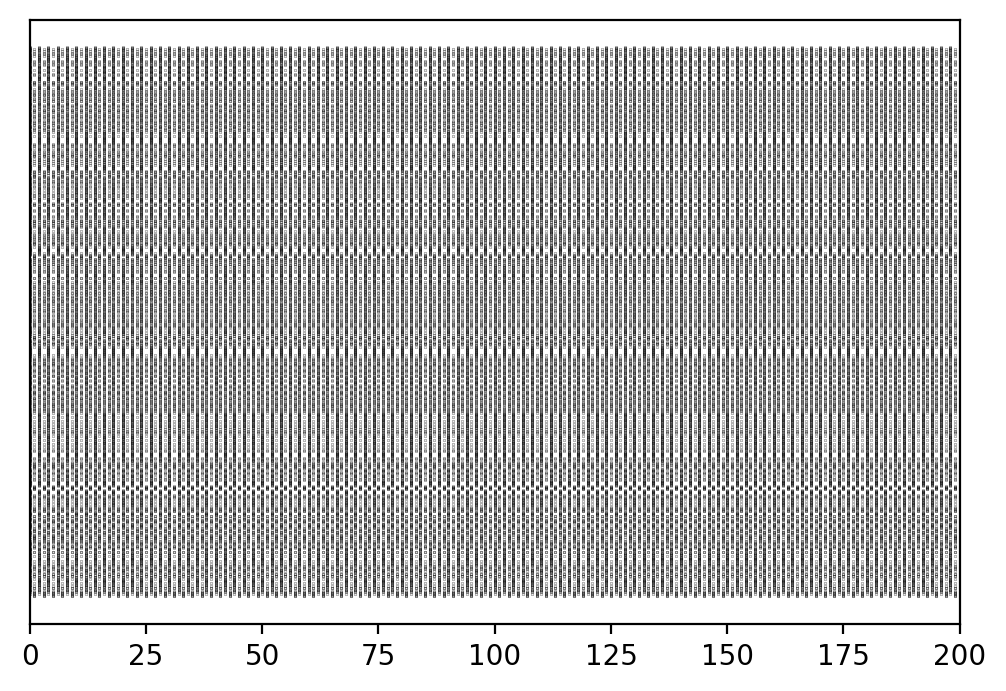

In [307]:
plt.figure(dpi=200)
rasterplot(spike_history[:,200:400], 1, s=.01)

# Visuals

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.dpi'] = 200

In [76]:
def rasterplot(spike_history, dt, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    n, t = np.nonzero(spike_history)
    ax.scatter(t, n, color='k', **kwargs)
    ax.set_yticks([])
    ax.set_xlim(0, spike_history.shape[1])
    
    xticks = ax.get_xticks()
    ax.set_xticklabels((xticks*dt).astype(int))
    return ax

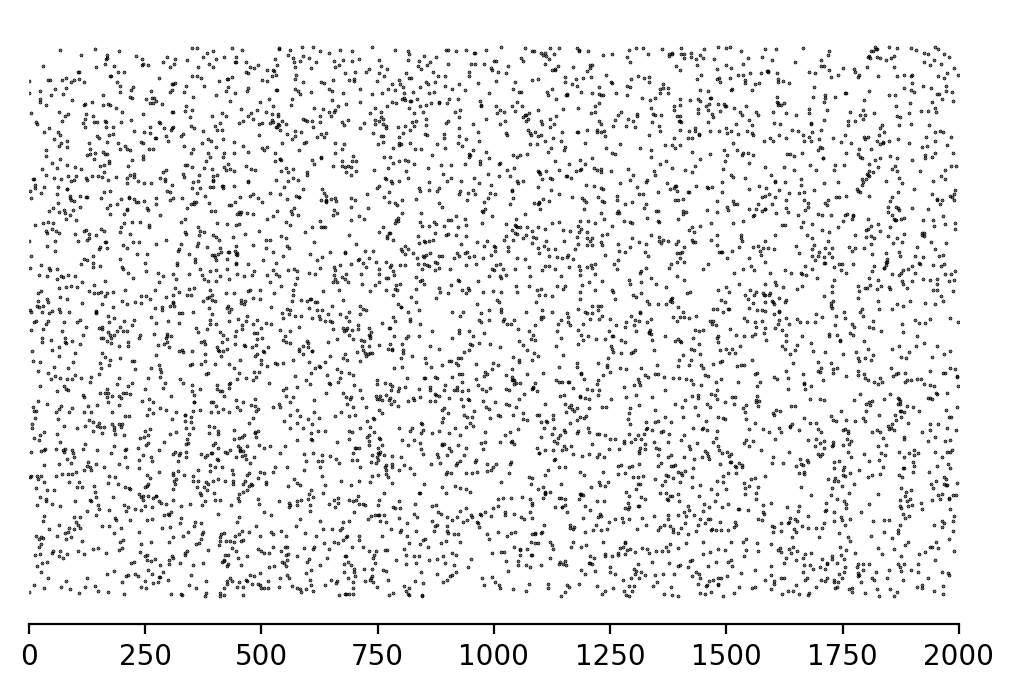

In [112]:
spike_history = (np.random.rand(500,2000) > .995).astype(int) # Random "s"
rasterplot(spike_history, 1, s=.1)
sns.despine(left=True)